In [4]:
import os
os.environ['KAGGLE_USERNAME'] = "*********" # username from the json file
os.environ['KAGGLE_KEY'] = "***************" # key from the json file

In [5]:
!kaggle datasets download -d sanikamal/rock-paper-scissors-dataset

 98% 442M/452M [00:06<00:00, 81.0MB/s]
100% 452M/452M [00:06<00:00, 73.8MB/s]


In [ ]:
!unzip rock-paper-scissors-dataset.zip

In [34]:
base_dir ='/content/Rock-Paper-Scissors'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join('/content/rock-paper-scissors/Rock-Paper-Scissors','validation')

train_paper_dir = os.path.join(train_dir,'paper')
train_rock_dir = os.path.join(train_dir,'rock')
train_scissors_dir = os.path.join(train_dir,'scissors')

test_paper_dir = os.path.join(test_dir,'paper')
test_rock_dir = os.path.join(test_dir,'rock')
test_scissors_dir = os.path.join(test_dir,'scissors')

#validation_paper_dir = os.path.join(validation_dir,'paper')
#validation_rock_dir = os.path.join(validation_dir,'rock')
#validation_scissors_dir = os.path.join(validation_dir,'scissors')



In [8]:
paper_fnames = os.listdir(train_paper_dir)
print(paper_fnames[:10])
rock_fnames = os.listdir(train_rock_dir)
print(rock_fnames[:10])
scissors_fnames = os.listdir(train_scissors_dir)
print(scissors_fnames[:10])

['paper04-036.png', 'paper07-003.png', 'paper01-034.png', 'paper07-066.png', 'paper06-031.png', 'paper04-048.png', 'paper07-106.png', 'paper07-086.png', 'paper01-019.png', 'paper04-112.png']
['rock02-038.png', 'rock04-041.png', 'rock06ck02-058.png', 'rock04-038.png', 'rock07-k03-118.png', 'rock04-088.png', 'rock04-066.png', 'rock07-k03-033.png', 'rock02-006.png', 'rock03-104.png']
['scissors01-080.png', 'testscissors01-100.png', 'scissors04-047.png', 'scissors03-031.png', 'scissors04-116.png', 'scissors03-006.png', 'testscissors02-046.png', 'testscissors03-073.png', 'testscissors02-112.png', 'scissors04-112.png']


In [9]:
print("train paper:",len(paper_fnames))
print("train rocks:",len(rock_fnames))
print("train scissors:",len(scissors_fnames))
print("test paper:",len(os.listdir(test_paper_dir)))
print("test rocks:",len(os.listdir(test_rock_dir)))
print("test scissors:",len(os.listdir(test_scissors_dir)))
print("valid paper:",len(os.listdir(validation_dir)))


train paper: 840
train rocks: 840
train scissors: 840
test paper: 124
test rocks: 124
test scissors: 124
valid paper: 33


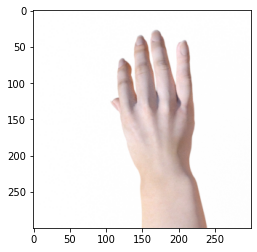

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
#i = np.random.randint(1,len(cats_fnames))
#plt.imshow(os.path.join(train_cats_dir,))
for i in paper_fnames[:10]:
  img_path = os.path.join(train_paper_dir,i)
  img = mpimg.imread(img_path)
  plt.imshow(img)

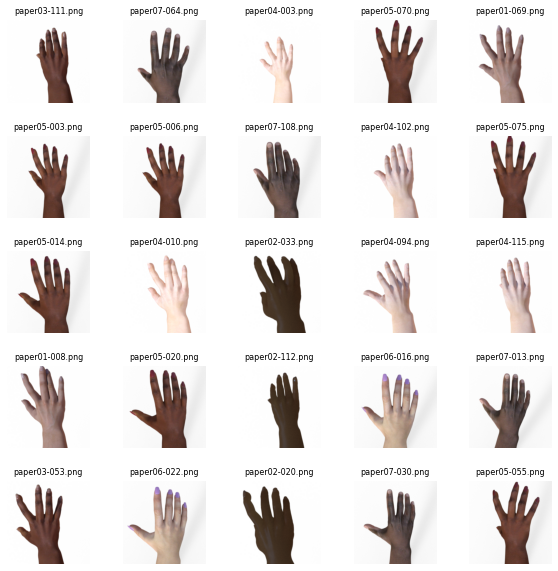

In [11]:
import random
W_grid = 5
L_grid = 5

fig , axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes = axes.ravel()
#n_training = len(X_train)

for i in np.arange(0,W_grid*L_grid):
  #index = np.random.randint(0,len(cats_fnames))
  index=random.choice(paper_fnames)
  img_path = os.path.join(train_paper_dir,index)
  img = mpimg.imread(img_path)
  #plt.imshow(img)
  axes[i].imshow(img)
  axes[i].set_title(index, fontsize = 8)
 # axes[i].set_title(y_train[index], fontsize = 15)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    )

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    )

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size=(300,300),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    )

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Found 33 images belonging to 4 classes.


In [23]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPool2D(2, 2))
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5)) # Note the only change is that we added dropout here
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 78400)            

In [24]:
history = model.fit(
    x=train_generator,
    #steps_per_epoch=100,
    epochs=10,
    validation_data = test_generator,
    #validation_steps = 50,
    verbose=1
)

Epoch 1/10
79/79 [==============================] - 289s 4s/step - loss: 1.1812 - acc: 0.4738 - val_loss: 0.9578 - val_acc: 0.6425
Epoch 2/10
79/79 [==============================] - 282s 4s/step - loss: 0.5597 - acc: 0.7599 - val_loss: 0.4765 - val_acc: 0.7849
Epoch 3/10
79/79 [==============================] - 282s 4s/step - loss: 0.4987 - acc: 0.7988 - val_loss: 0.8464 - val_acc: 0.6989
Epoch 4/10
79/79 [==============================] - 283s 4s/step - loss: 0.4101 - acc: 0.8512 - val_loss: 0.3683 - val_acc: 0.7231
Epoch 5/10
79/79 [==============================] - 283s 4s/step - loss: 0.3346 - acc: 0.8746 - val_loss: 0.4769 - val_acc: 0.8199
Epoch 6/10
79/79 [==============================] - 282s 4s/step - loss: 0.2488 - acc: 0.9131 - val_loss: 0.9984 - val_acc: 0.8280
Epoch 7/10
79/79 [==============================] - 284s 4s/step - loss: 0.2295 - acc: 0.9234 - val_loss: 0.7350 - val_acc: 0.8763
Epoch 8/10
79/79 [==============================] - 284s 4s/step - loss: 0.1997 - a

Text(0.5, 0, 'epochs')

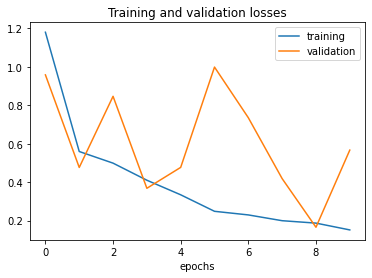

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

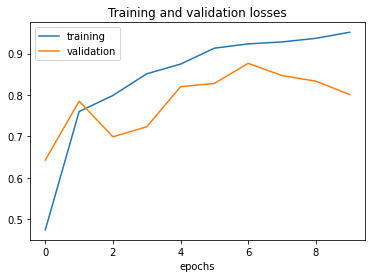

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')

In [ ]:
test_loss, test_acc = model.evaluate_generator(validation_generator, steps=90)
print('test acc:', test_acc)

In [41]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img = image.load_img(path , target_size=(300,300))
  x = image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(fn)
  print(classes)

Saving rockkkk.png to rockkkk (1).png
rockkkk.png
[[0. 1. 0.]]
